In [2]:
import tomopy
import matplotlib.pyplot as plt
import numpy as np
import k3d

k3d.switch_to_text_protocol()

In [3]:
import tifffile as tiff
import glob
import tqdm

file_names = sorted(glob.glob("/home/nhattm/ToMoDL/datasets/ctf/*.tif"))
sinos = []
for file_name in tqdm.tqdm(file_names):
    sino = tiff.imread(file_name)
    sino = np.asarray(sino)
    sino = sino.astype(np.float32)
    sinos.append(sino)

sinos = np.stack(sinos)


100%|██████████| 1800/1800 [00:48<00:00, 36.90it/s]


In [2]:
import tifffile as tiff
import glob
import tqdm
from natsort import natsorted
from PIL import Image
file_names = natsorted(glob.glob("/home/nhattm/ToMoDL/datasets/student_data/*.jpg"))
sinos = []
for file_name in tqdm.tqdm(file_names):
    sino = Image.open(file_name)
    sino = np.asarray(sino)
    sino = sino.astype(np.float32)
    sinos.append(sino)

sinos = np.stack(sinos)

100%|██████████| 100/100 [00:00<00:00, 1612.10it/s]


In [136]:
# sinos = tomopy.minus_log(sinos)


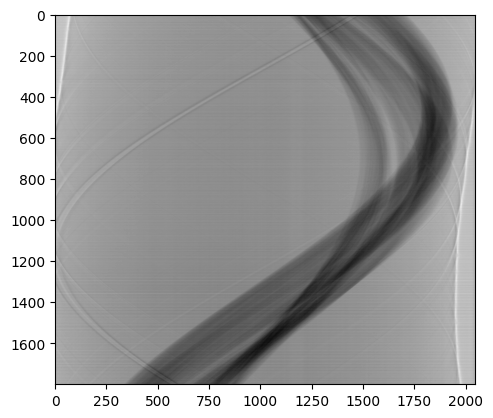

In [4]:
plt.imshow(sinos[:,100, :], cmap="gray")
plt.show()

In [5]:
theta = tomopy.angles(sinos.shape[0])
extra_options = {'MinConstraint': 0}
options = {
    # 'proj_type': 'cuda',
    # "filter_name": "ramlak",

    # 'num_iter': 200,
    # 'extra_options': extra_options,
    # "accelerated": True
}
rec = tomopy.recon(sinos,theta, algorithm="gridrec",filter_name= "ramlak")



: 

In [ ]:
#save the reconstruction
tiff.imwrite("reconstruction.tif", rec)


In [11]:
# build a widget to show the reconstruction
from ipywidgets import interact

def show_recon(i):
    plt.imshow(rec[i], cmap="gray")
    plt.show()

interact(show_recon, i=(0, rec.shape[0]-1))

interactive(children=(IntSlider(value=239, description='i', max=479), Output()), _dom_classes=('widget-interac…

<function __main__.show_recon(i)>

In [6]:

# run this block again if nothing appear
plt_volume = k3d.volume(rec.astype(np.float16),
                        alpha_coef=5.,
                        samples=128,
                        ray_samples_count=4,
                        interpolation=True,
                        compression_level=9,
                        )

plot = k3d.plot()
plot += plt_volume

plot.display() # You can also just use 'plot'

Output()

interactive(children=(IntSlider(value=239, description='i', max=479), Output()), _dom_classes=('widget-interac…

<function __main__.show_recon(i)>